In [1]:
source("../R/process_slim_output.R")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [44]:
options(repr.plot.width=9, repr.plot.height=4)

## Comparison of Neanderthal- and modern human-specific deleterious variants

In [2]:
slim_file <- read_slim_file("../simulations/exome_and_sites__h_0.5__seed_6977220333793.txt")

Read mutations that occured on the Neanderthal lineage:

In [22]:
nea_mut <- read_mutations(slim_file, "m0", "p2")

In [25]:
nea_mut <- mutate(nea_mut, freq=freq / (2 * 1000))

Read mutations that occured on the modern human lineage after the split from Neanderthals:

In [23]:
mh_mut <- read_mutations(slim_file, "m0", "p1", t=50000)

In [25]:
mh_mut <- mutate(mh_mut, freq=freq / (2 * (10000 + 1861)))

Warning message:
: Removed 1 rows containing non-finite values (stat_ydensity).

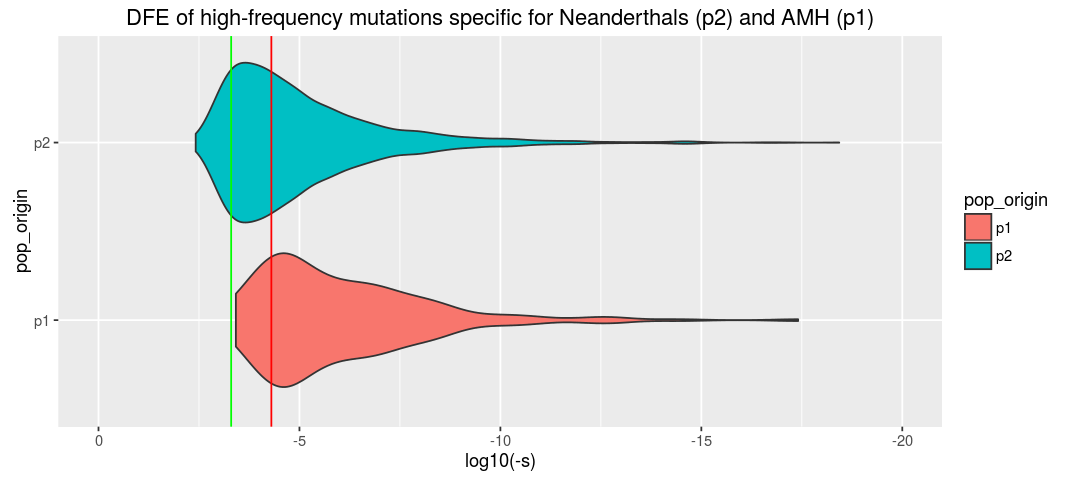

In [60]:
ggplot(rbind(nea_mut, mh_mut) %>% filter(freq > 0.8), aes(pop_origin, log10(-s), fill=pop_origin)) +
    geom_violin() +
    geom_hline(yintercept=log10(1/(2 * c(1000, 10000))), color=c("green", "red")) +
    coord_flip() +
    ylim(0, -20) +
    labs(title="DFE of high-frequency mutations specific for Neanderthals (p2) and AMH (p1)")

## Changes in _s_ of introgressed alleles through time

In [6]:
slim_file <- read_slim_file("../simulations/exonic_and_nonexonic/exonic_and_nonexonic__h_0.5__init_nea_0.1__rep_1__dump_gen1.txt")

In [ ]:
introgr_mut <- read_mutations(slim_file, "m0", "p2")

In [ ]:
control_mut <- read_mutations(slim_file, "m0", "p1", t=50000)